# K-Nearest Neighbor Classification

#### Load the packages and import the data

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv("./Data Files/KNN_Test_File.csv")
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [3]:
data.columns

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC', 'TARGET CLASS'],
      dtype='object')

#### Split data into an X DataFrame and y vector

In [4]:
X = data[['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC']]
y = data["TARGET CLASS"]

#### Split the data into a train_set and test_set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1111)

#### Center and Scale X

In [6]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
for i in X_train.columns:
    if X_train[i].dtypes in ["float64", "int64"]:
        m = X_train[i].mean()
        s = X_train[i].std()
        X_train_scaled[i] = (X_train[i] - m) / s
        X_test_scaled[i] = (X_test[i] - m) / s

#### Fit the base KNN Model

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5)  # Can increase the number of neighbors
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

#### Predict on Test Set

In [8]:
y_pred = knn_model.predict(X_test_scaled)
pred_summary = X_test.copy()
pred_summary[y.name] = y_test
pred_summary["y_pred"] = y_pred
pred_summary.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS,y_pred
293,1217.920261,1203.490761,1394.491567,602.423995,1070.162164,532.905663,2921.461027,833.465118,915.825058,1554.984355,1,0
123,1354.295510,1249.179473,2411.360681,473.119395,561.367036,1627.105621,1991.380305,257.858218,851.293768,2365.294860,1,1
939,1523.553619,857.440411,1465.283564,418.786886,533.168737,2101.790772,672.345467,221.088679,1141.123876,1059.138022,1,1
38,1155.350566,1608.608028,1106.957687,571.448866,1184.461052,926.633642,2014.950226,1075.797115,1621.316385,422.196086,0,0
831,1465.214823,1507.503133,671.501756,372.742295,662.022599,640.723687,780.946858,550.578344,656.951674,1267.137620,0,0


#### Evaluate the base KNN Model

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Base KNN Model", "\n")
print(pd.DataFrame(confusion_matrix(y_test, y_pred)), 
      "      Accuracy:", round(accuracy_score(y_test, y_pred), 3), 
      "\n")
print(classification_report(y_test, y_pred))

Base KNN Model 

     0    1
0  113   36
1   28  123       Accuracy: 0.79 

             precision    recall  f1-score   support

          0       0.80      0.76      0.78       149
          1       0.77      0.81      0.79       151

avg / total       0.79      0.79      0.79       300



#### Use "Elbow Method" to tune the model

In [10]:
error_rate = []
max_k = range(1, 41)  # Specified max number of k's to test

for i in max_k:
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_train_scaled, y_train)
    pred_i = knn_model.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

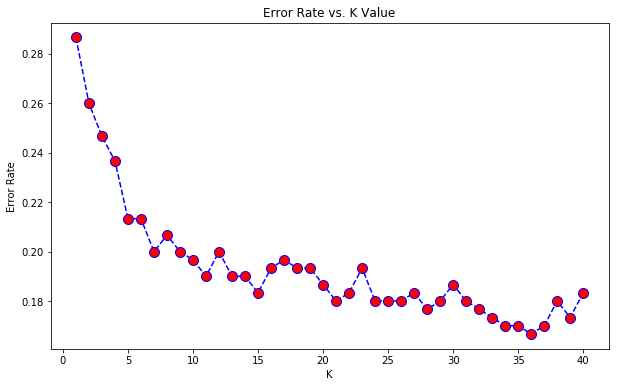

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.plot(max_k, error_rate, color = 'blue', linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### Fit and evaluate new model using the new "optimal" value of K obtained from elbow plot above

In [13]:
knn_model = KNeighborsClassifier(n_neighbors = 15)  # Tune this parameter using plot above
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)

print("Refined KNN Model", "\n")
print(pd.DataFrame(confusion_matrix(y_test, y_pred)), 
      "      Accuracy:", round(accuracy_score(y_test, y_pred), 3), 
      "\n")
print(classification_report(y_test, y_pred))

Refined KNN Model 

     0    1
0  120   29
1   26  125       Accuracy: 0.817 

             precision    recall  f1-score   support

          0       0.82      0.81      0.81       149
          1       0.81      0.83      0.82       151

avg / total       0.82      0.82      0.82       300

